In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
data = pd.read_excel(io='./data1.xlsx', sheet_name=None)

In [168]:
for i in data:
    print(i)

基本信息
跑步
步行
骑行
健身
羽毛球
心率


In [190]:
data['基本信息']['日期'] = data['基本信息']['时间'].dt.date
data['基本信息']

0     2020-09-21 10:27:50
1     2020-09-21 10:37:50
2     2020-09-21 10:47:50
3     2020-09-21 10:57:50
4     2020-09-21 11:07:50
              ...        
408   2020-09-27 19:37:46
409   2020-09-27 19:47:46
410   2020-09-27 20:16:56
411   2020-09-27 20:26:56
412   2020-09-27 21:02:40
Name: 时间, Length: 413, dtype: datetime64[ns]

In [170]:
date = sorted(list(set(list(data['基本信息']['日期']))))
date

[datetime.date(2020, 9, 21),
 datetime.date(2020, 9, 22),
 datetime.date(2020, 9, 23),
 datetime.date(2020, 9, 24),
 datetime.date(2020, 9, 25),
 datetime.date(2020, 9, 26),
 datetime.date(2020, 9, 27)]

## 统计一周中每天的步数、距离的情况

In [171]:
bs = list(data['基本信息'].groupby("日期")["步数"].max())
jl = list(data['基本信息'].groupby("日期")["距离"].max())

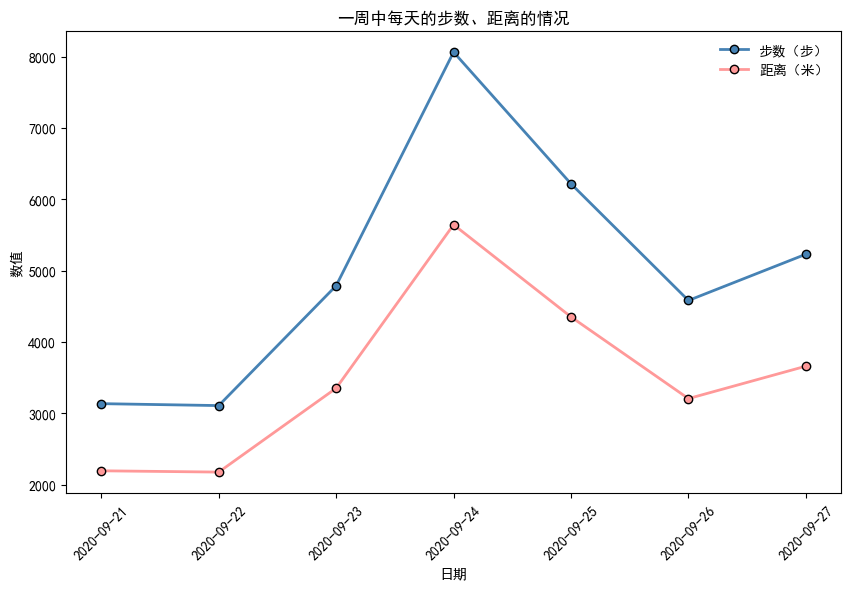

In [172]:
# 折线图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图框的大小
fig = plt.figure(figsize=(10, 6))

# 绘图，做折线图
plt.plot(date,  #x轴
         bs,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='steelblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='steelblue',  # 点的填充色
         label='步数（步）'  #标签
         )
plt.plot(date,  #x轴
         jl,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#ff9999',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#ff9999',  # 点的填充色
         label='距离（米）'  #标签
         )

plt.title('一周中每天的步数、距离的情况')
plt.xlabel('日期')
plt.ylabel('数值')
plt.xticks(rotation=45)  #x轴标签倾斜60度

plt.legend(loc='best', frameon=False)  #图例，显示label，去掉边框

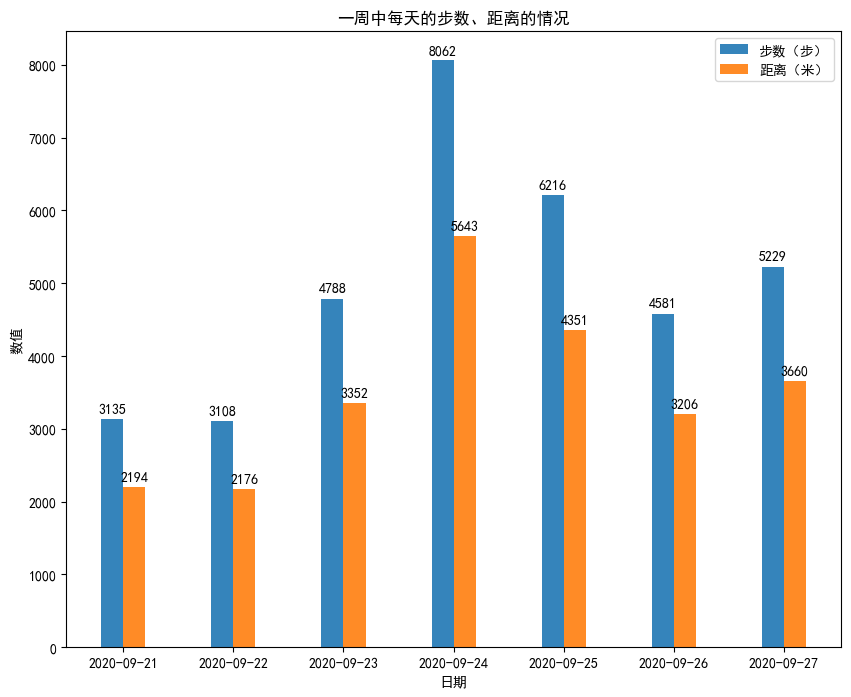

In [173]:
# 柱状图

#生成信息
width = 0.2
xpos = np.arange(0, len(bs))

#生成柱状图
fig, ax = plt.subplots(figsize=(10, 8))
bars1 = plt.bar(xpos - width / 2, bs, align='center', width=width, alpha=0.9, color='#1f77b4', label='步数（步）')
bars2 = plt.bar(xpos + width / 2, jl, align='center', width=width, alpha=0.9, color='#ff7f0e', label='距离（米）')

#设置每个柱子下面的记号
ax.set_xticks(xpos)  #确定每个记号的位置
ax.set_xticklabels(date)  #确定每个记号的内容

ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

#展示结果
plt.title('一周中每天的步数、距离的情况')
plt.xlabel('日期')
plt.ylabel('数值')
plt.legend()
plt.show()

## 统计每日消耗卡路里情况

In [174]:
kll = list(data['基本信息'].groupby("日期")["卡路里"].max())
kll

[124, 134, 218, 337, 456, 225, 344]

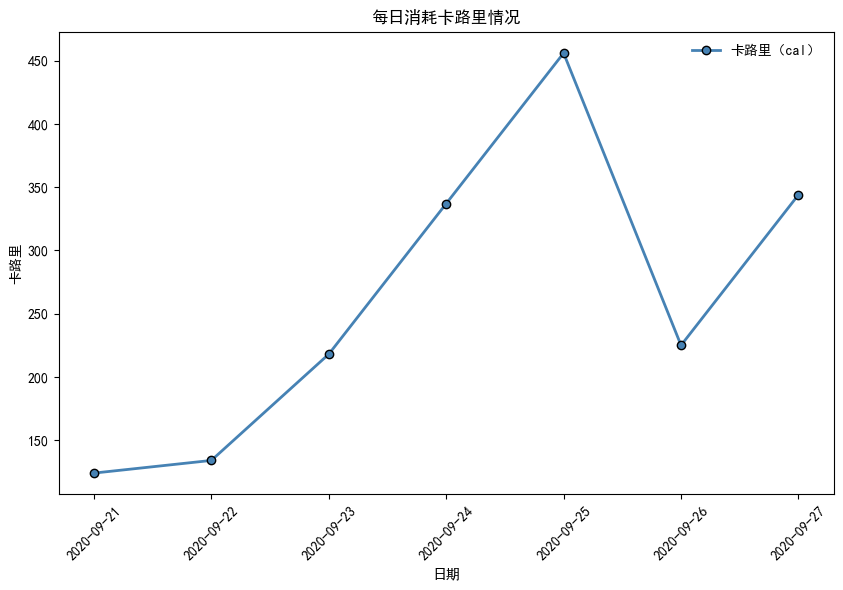

In [175]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(10, 6))

# 绘图，做折线图
plt.plot(date,  #x轴
         kll,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='steelblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='steelblue',  # 点的填充色
         label='卡路里（cal）'  #标签
         )

# 添加标题和坐标轴标签
plt.title('每日消耗卡路里情况')
plt.xlabel('日期')
plt.ylabel('卡路里')
plt.xticks(rotation=45)

plt.legend(loc='best', frameon=False)  #图例，显示label，去掉边框

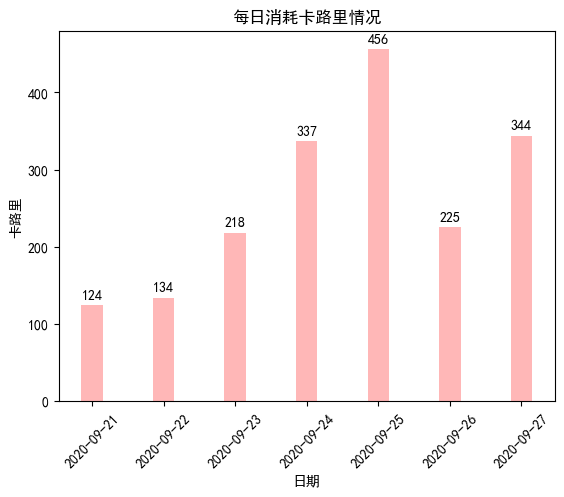

In [176]:
bar1 = plt.bar(np.arange(0, len(kll)), kll, align='center', width=0.3, alpha=0.7, color='#ff9999', tick_label=date)

plt.bar_label(bar1, padding=3)

#展示结果
plt.title('每日消耗卡路里情况')
plt.xlabel('日期')
plt.ylabel('卡路里')
plt.xticks(rotation=45)
plt.show()


## 统计每日心率情况

In [177]:
xl_avg = list(data['基本信息'].groupby("日期")['心率'].mean())
xl_min = list(data['基本信息'].groupby("日期")['心率'].min())
xl_max = list(data['基本信息'].groupby("日期")['心率'].max())

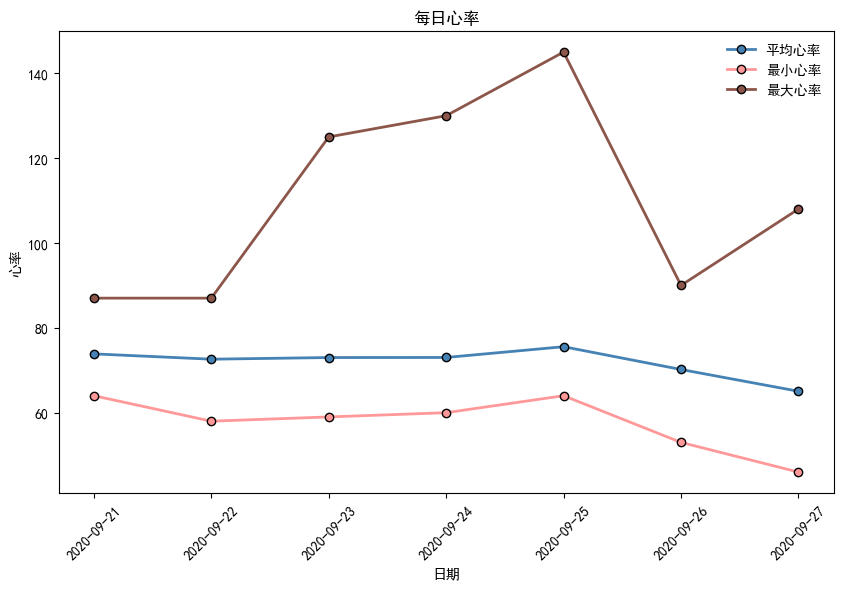

In [178]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图框的大小
fig = plt.figure(figsize=(10, 6))

# 绘图，做折线图
plt.plot(date,  #x轴
         xl_avg,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='steelblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='steelblue',  # 点的填充色
         label='平均心率'  #标签
         )
plt.plot(date,  #x轴
         xl_min,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#ff9999',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#ff9999',  # 点的填充色
         label='最小心率'  #标签
         )
plt.plot(date,  #x轴
         xl_max,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#8c564b',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#8c564b',  # 点的填充色
         label='最大心率'  #标签
         )

# 添加标题和坐标轴标签
plt.title('每日心率')
plt.xlabel('日期')
plt.ylabel('心率')
plt.xticks(rotation=45)

plt.legend(loc='best', frameon=False)  #图例，显示label，去掉边框
plt.show()

## 统计每日温度情况

In [179]:
t_avg = list(data['基本信息'].groupby("日期")['室外温度'].mean())
t_min = list(data['基本信息'].groupby("日期")['室外温度'].min())
t_max = list(data['基本信息'].groupby("日期")['室外温度'].max())

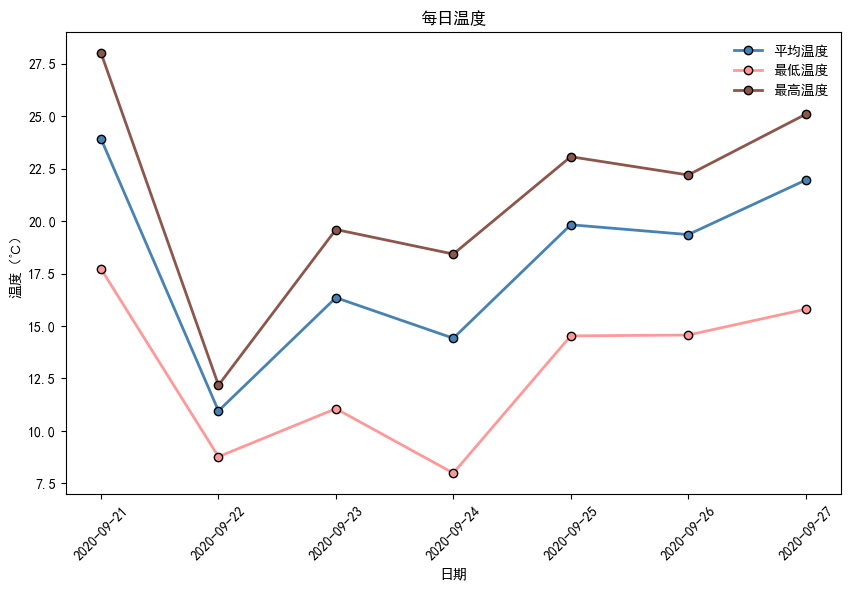

In [180]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图框的大小
fig = plt.figure(figsize=(10, 6))

# 绘图，做折线图
plt.plot(date,  #x轴
         t_avg,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='steelblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='steelblue',  # 点的填充色
         label='平均温度'  #标签
         )
plt.plot(date,  #x轴
         t_min,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#ff9999',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#ff9999',  # 点的填充色
         label='最低温度'  #标签
         )
plt.plot(date,  #x轴
         t_max,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#8c564b',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#8c564b',  # 点的填充色
         label='最高温度'  #标签
         )

# 添加标题和坐标轴标签
plt.title('每日温度')
plt.xlabel('日期')
plt.ylabel('温度（℃）')
plt.xticks(rotation=45)

plt.legend(loc='best', frameon=False)  #图例，显示label，去掉边框
plt.show()

## 统计每日体温变化

In [181]:
t_avg = list(data['基本信息'].groupby("日期")['体温'].mean())
t_min = list(data['基本信息'].groupby("日期")['体温'].min())
t_max = list(data['基本信息'].groupby("日期")['体温'].max())

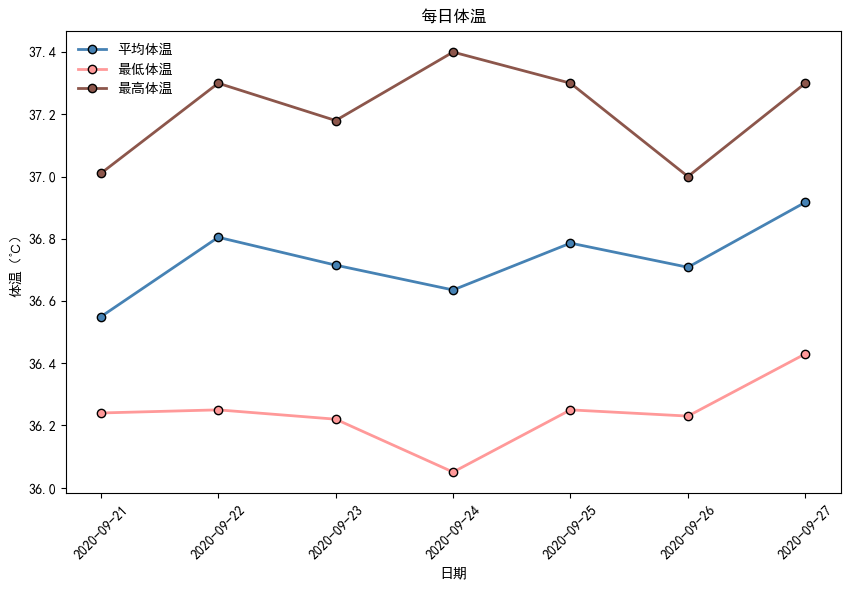

In [182]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图框的大小
fig = plt.figure(figsize=(10, 6))

# 绘图，做折线图
plt.plot(date,  #x轴
         t_avg,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='steelblue',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='steelblue',  # 点的填充色
         label='平均体温'  #标签
         )
plt.plot(date,  #x轴
         t_min,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#ff9999',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#ff9999',  # 点的填充色
         label='最低体温'  #标签
         )
plt.plot(date,  #x轴
         t_max,  #y轴
         linestyle='-',  # 折线类型
         linewidth=2,  # 折线宽度
         color='#8c564b',  # 折线颜色
         marker='o',  # 点的形状
         markersize=6,  # 点的大小
         markeredgecolor='black',  # 点的边框色
         markerfacecolor='#8c564b',  # 点的填充色
         label='最高体温'  #标签
         )

# 添加标题和坐标轴标签
plt.title('每日体温')
plt.xlabel('日期')
plt.ylabel('体温（℃）')
plt.xticks(rotation=45)

plt.legend(loc='best', frameon=False)  #图例，显示label，去掉边框
plt.show()

## 统计运动情况

In [183]:
data['跑步']['类型'] = '跑步'
data['步行']['类型'] = '步行'
data['骑行']['类型'] = '骑行'
data['健身']['类型'] = '健身'
data['羽毛球']['类型'] = '羽毛球'
yd = data['跑步'].append(data['步行'], ignore_index=True).append(data['骑行'], ignore_index=True).append(data['健身'],
                                                                                                         ignore_index=True).append(
    data['羽毛球'], ignore_index=True)
yd['日期'] = yd['时间'].dt.date
yd['持续时间（秒）'] = [i.hour * 3600 + i.minute * 60 + i.second for i in yd['持续时间']]
yd

C:\Users\yaojie\AppData\Local\Temp\ipykernel_8544\863762791.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yd = data['跑步'].append(data['步行'], ignore_index=True).append(data['骑行'], ignore_index=True).append(data['健身'],
C:\Users\yaojie\AppData\Local\Temp\ipykernel_8544\863762791.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yd = data['跑步'].append(data['步行'], ignore_index=True).append(data['骑行'], ignore_index=True).append(data['健身'],
C:\Users\yaojie\AppData\Local\Temp\ipykernel_8544\863762791.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yd = data['跑步'].append(data['步行'], ignore_index=True).append(data['骑行'], ignore_index=True).append(data['健身'],


,id,时间,持续时间,距离,心率,类型,卡路里,日期,持续时间（秒）
0,PB2009231958,2020-09-23 19:58:11,00:23:53,3732.0,66-125,跑步,NaN,2020-09-23,1433
1,PB2009242002,2020-09-24 20:02:01,00:31:23,4613.0,60-130,跑步,NaN,2020-09-24,1883
2,PB2009271956,2020-09-27 19:56:13,00:20:43,3221.0,58-114,跑步,NaN,2020-09-27,1243
3,BX2009211842,2020-09-21 18:42:02,00:32:43,1985.0,58-90,步行,NaN,2020-09-21,1963
4,BX2009221853,2020-09-22 18:53:50,00:28:21,1766.0,61-87,步行,NaN,2020-09-22,1701
5,BX2009241852,2020-09-24 18:52:35,00:24:19,2104.0,64-91,步行,NaN,2020-09-24,1459
6,BX2009261848,2020-09-26 18:48:12,00:31:11,2501.0,62-94,步行,NaN,2020-09-26,1871
7,QX2009261016,2020-09-26 10:16:11,00:10:43,NaN,58-90,骑行,34.0,2020-09-26,643
8,QX2009261122,2020-09-26 11:22:09,00:12:13,NaN,64-94,骑行,36.0,2020-09-26,733
9,JS2009272032,2020-09-27 20:32:21,00:30:19,NaN,66-110,健身,108.0,2020-09-27,1819


In [184]:
lx = list(yd.groupby('类型')['持续时间（秒）'].sum())
yd.groupby('类型')['持续时间（秒）'].sum()

类型
健身     1819
步行     6994
羽毛球    2423
跑步     4559
骑行     1376
Name: 持续时间（秒）, dtype: int64

0时30分19秒
1时56分34秒
0时40分23秒
1时15分59秒
0时22分56秒


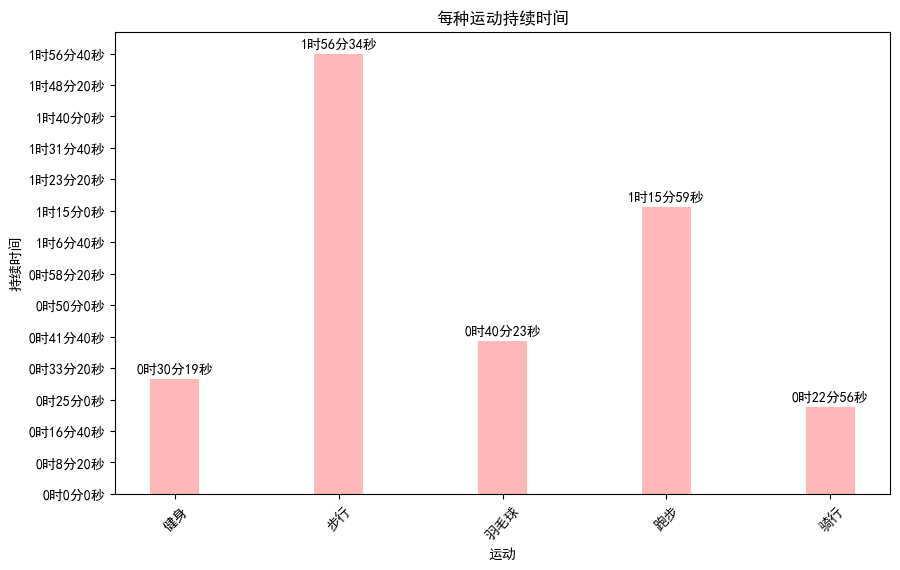

In [185]:
for i in lx:
    print("%d时%d分%d秒" % (i / 3600, i % 3600 / 60, i % 60))

fig = plt.figure(figsize=(10, 6))

bar1 = plt.bar(np.arange(0, len(lx)), lx, align='center', width=0.3, alpha=0.7, color='#ff9999',
               tick_label=['健身', '步行', '羽毛球', '跑步', '骑行'])

plt.bar_label(bar1, padding=3, labels=["%d时%d分%d秒" % (i / 3600, i % 3600 / 60, i % 60) for i in lx])

#展示结果
plt.title('每种运动持续时间')
plt.xlabel('运动')
plt.ylabel('持续时间')
plt.xticks(rotation=45)
plt.yticks(labels=["%d时%d分%d秒" % (i / 3600, i % 3600 / 60, i % 60) for i in range(0, 7500, 500)],
           ticks=range(0, 7500, 500))
plt.show()

## 每日运动持续时长

In [186]:
mrydcxsij = list(yd.groupby('日期')['持续时间（秒）'].sum())

0时32分43秒
0时28分21秒
0时23分53秒
0时55分42秒
0时40分23秒
0时54分7秒
0时51分2秒


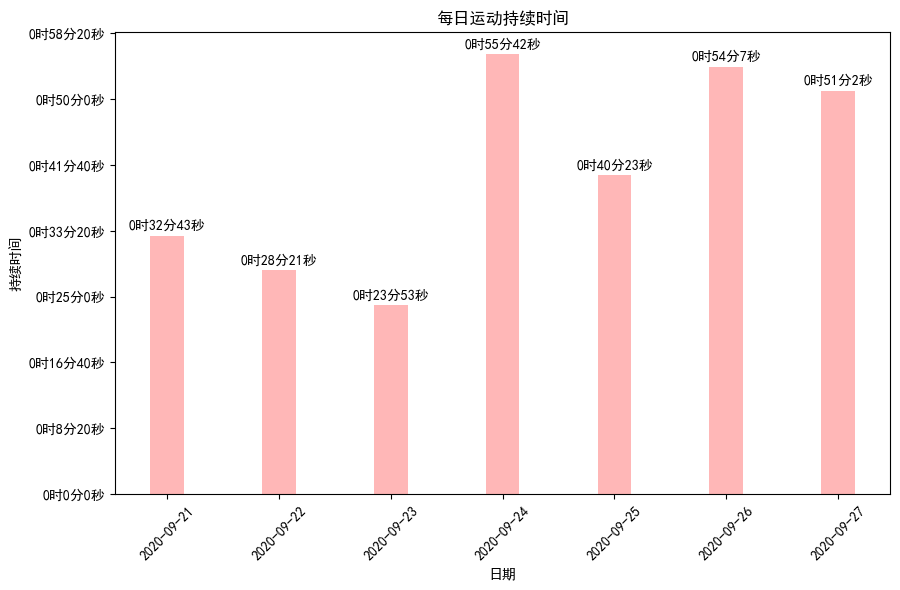

In [187]:
for i in mrydcxsij:
    print("%d时%d分%d秒" % (i / 3600, i % 3600 / 60, i % 60))

fig = plt.figure(figsize=(10, 6))

bar1 = plt.bar(np.arange(0, len(mrydcxsij)), mrydcxsij, align='center', width=0.3, alpha=0.7, color='#ff9999',
               tick_label=date)

plt.bar_label(bar1, padding=3, labels=["%d时%d分%d秒" % (i / 3600, i % 3600 / 60, i % 60) for i in mrydcxsij])

#展示结果
plt.title('每日运动持续时间')
plt.xlabel('日期')
plt.ylabel('持续时间')
plt.xticks(rotation=45)
plt.yticks(labels=["%d时%d分%d秒" % (i / 3600, i % 3600 / 60, i % 60) for i in range(0, 4000, 500)],
           ticks=range(0, 4000, 500))
plt.show()

## 每次运动心率最大值、最小值、平均值

In [188]:
sorted_yd = yd.sort_values('时间')
cishu = [i + 1 for i in range(0, len(sorted_yd))]

id = list(sorted_yd['id'])
xl_id = data['心率']['id']
xl_xl = data['心率']['心率']
idx = []
x = 0
for i in range(0, len(id)):
    for j in range(0, len(xl_id)):
        if id[i] == xl_id[j]:
            idx.append(j)
            x = x + 1
            # print(xl_id[j])

xl_min = []
xl_max = []
xl_avg = []

for i in range(0, len(idx)):
    sum = 0
    min = xl_xl[idx[i]]
    max = xl_xl[idx[i]]
    t = 0
    if i == len(idx) - 1:
        t = len(xl_id) - idx[i]
        for j in range(idx[i], len(xl_id)):
            sum = sum + xl_xl[j]
            if min > xl_xl[j]: min = xl_xl[j]
            if max < xl_xl[j]: max = xl_xl[j]
    else:
        t = idx[i + 1] - idx[i]
        for j in range(idx[i], idx[i + 1]):
            sum = sum + xl_xl[j]
            if min > xl_xl[j]: min = xl_xl[j]
            if max < xl_xl[j]: max = xl_xl[j]
    xl_avg.append(int(sum / t))
    xl_max.append(max)
    xl_min.append(min)

print(xl_avg)
print(xl_max)
print(xl_min)


[77, 76, 105, 79, 106, 117, 81, 86, 79, 101, 103]
[90, 87, 125, 91, 130, 145, 90, 94, 92, 114, 110]
[58, 61, 66, 64, 60, 65, 58, 64, 62, 58, 66]


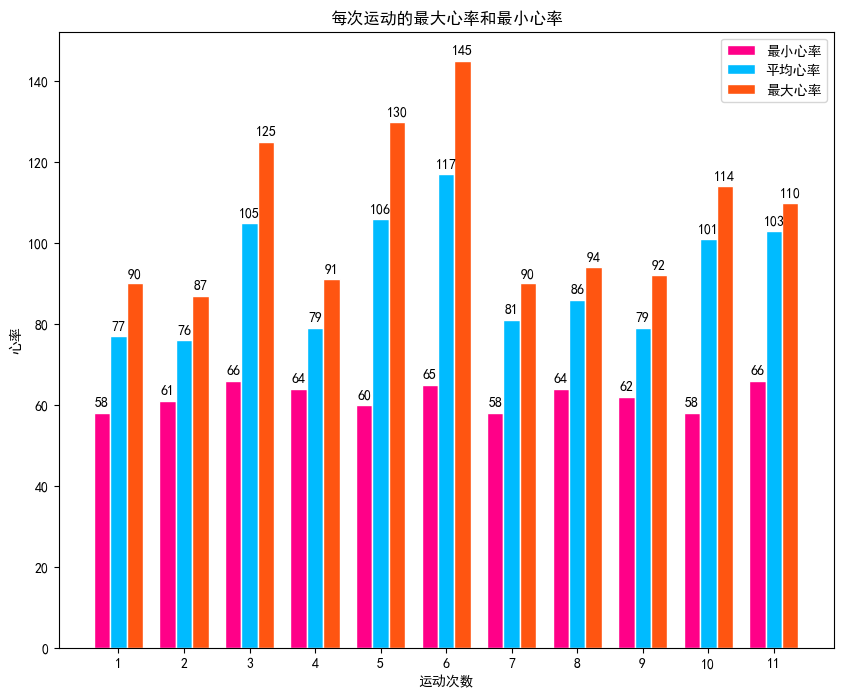

In [189]:
barWidth = 0.25

r1 = np.arange(len(xl_min))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
fig, ax = plt.subplots(figsize=(10, 8))
# 创建柱子
bar1 = plt.bar(r1, xl_min, color='#FF0088', width=barWidth, edgecolor='white', label='最小心率')
bar2 = plt.bar(r2, xl_avg, color='#00BBFF', width=barWidth, edgecolor='white', label='平均心率')
bar3 = plt.bar(r3, xl_max, color='#FF5511', width=barWidth, edgecolor='white', label='最大心率')

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
ax.bar_label(bar3, padding=3)

# 添加x轴名称
plt.xticks([r + barWidth for r in range(len(xl_min))], cishu)
plt.title('每次运动的最大心率和最小心率')
plt.xlabel('运动次数')
plt.ylabel('心率')
plt.legend()
plt.show()